# Graphing key values for the Netherlands and Austria

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

To make the graphs more readable for color-blind people, use a color-blind friendly tableau

In [3]:
plt.style.use('tableau-colorblind10')
lines = ["-","--","-.",":","-","--","-.",":"]

In [4]:
natacc = 'data/national accounts.csv' # open the file and have a look at it
pd.read_csv(natacc).head(5)

,Unnamed: 0,nace_r2_code,geo_code,nace_r2_name,geo_name,year,COMP,EMP,EMPE,GO_CP,...,H_EMP,H_EMPE,II_CP,II_PI,II_PYP,II_Q,VA_CP,VA_PI,VA_PYP,VA_Q
0,1,A,AT,"Agriculture, forestry and fishing",Austria,1995,3.637000e+02,2.731000e+02,20.590000,7656.1,...,7.103640e+05,3.919200e+04,3843.9,74.985756,4.168300e+03,5.126174e+03,3812.3,116.716558,3917.4,3.266289e+03
1,2,A,FR,"Agriculture, forestry and fishing",France,2010,8.401000e+03,7.610000e+02,322.000000,78779.0,...,1.887294e+06,4.517330e+05,46774.0,92.070620,4.715100e+04,5.080231e+04,32005.0,97.272183,24752.0,3.290252e+04
2,3,A,JP,"Agriculture, forestry and fishing",Japan,2012,2.719024e+06,2.936253e+06,613511.703125,12452177.0,...,4.422511e+06,1.089177e+06,6581305.0,93.133906,6.536720e+06,7.066497e+06,5870872.0,90.104341,5568288.0,6.515637e+06
3,4,A,DE,"Agriculture, forestry and fishing",Germany (until 1990 former territory of the FRG),1997,6.474000e+03,7.840000e+02,321.000000,42092.0,...,1.668000e+06,5.010000e+05,21865.0,61.279333,2.174100e+04,3.568087e+04,20227.0,105.035981,20199.0,1.925721e+04
4,5,A,NL,"Agriculture, forestry and fishing",Netherlands,2014,3.054000e+03,1.950000e+02,99.000000,30660.0,...,3.762530e+05,1.366410e+05,18986.0,103.017171,1.974100e+04,1.842994e+04,11674.0,100.151286,12371.0,1.165637e+04


In [5]:
#we only want data from the netherlands and austria
natacc = 'data/national accounts.csv'
df = pd.read_csv(natacc)
df = df[df['geo_name'].isin(['Netherlands', 'Austria'])]

# we only want year, nace_r2_code, geo_name, GVA and employee compensation denoted by 'VA_CP' and 'COMP' and GVA in linked prices 'VA_Q'
df = df[['year', 'nace_r2_code', 'geo_name', 'VA_CP', 'COMP', 'VA_Q']]

#rename the columns
df = df.rename(columns={'geo_name': 'country', 'nace_r2_code': 'sector', 'VA_CP': 'gva', 'COMP': 'employee compensation', 'VA_Q': 'gva linked prices'})

# we only want the rows where the sector is 'TOT_IND'
df = df[df['sector'] == 'TOT_IND']

#sort the data by year and country
df = df.sort_values(by=['year', 'country'])

print(df.head(5))


       year   sector      country       gva  employee compensation  \
55904  1995  TOT_IND      Austria  158600.9                89833.5   
55780  1995  TOT_IND  Netherlands  299252.0               165463.0   
55962  1996  TOT_IND      Austria  162995.7                90966.3   
55838  1996  TOT_IND  Netherlands  311312.0               171881.0   
56020  1997  TOT_IND      Austria  167876.5                92565.8   

       gva linked prices  
55904      213504.990001  
55780      416790.796477  
55962      217581.215985  
55838      430062.552387  
56020      222155.881619  


In [6]:
# we want to calculate labour share of income
df['LY share'] = df['employee compensation'] / df['gva']

# see if the calculation is correct in the dataframe
print(df.head(5))

       year   sector      country       gva  employee compensation  \
55904  1995  TOT_IND      Austria  158600.9                89833.5   
55780  1995  TOT_IND  Netherlands  299252.0               165463.0   
55962  1996  TOT_IND      Austria  162995.7                90966.3   
55838  1996  TOT_IND  Netherlands  311312.0               171881.0   
56020  1997  TOT_IND      Austria  167876.5                92565.8   

       gva linked prices  LY share  
55904      213504.990001  0.566412  
55780      416790.796477  0.552922  
55962      217581.215985  0.558090  
55838      430062.552387  0.552118  
56020      222155.881619  0.551392  


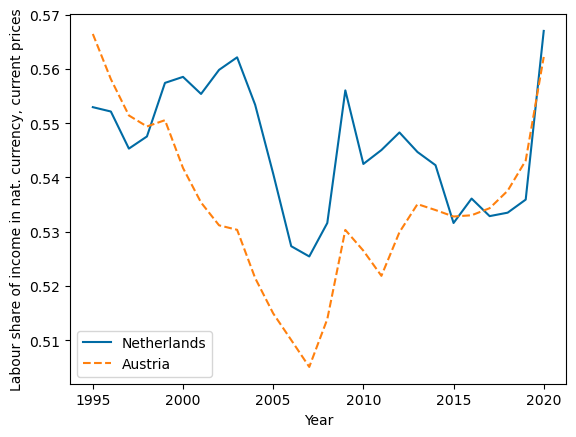

In [7]:
# plot the labour share of income for austria over time
countrylist = ('Netherlands','Austria') #List of countries to be plotted

ll=0
for country in countrylist:
    df_country = df[df['country'] == country]
    plt.plot(df_country['year'], df_country['LY share'], label = country, linestyle = lines[ll])
    ll+=1

plt.xlabel('Year')
plt.ylabel('Labour share of income in nat. currency, current prices')
plt.legend()
plt.show()


# Capital-output ratio 

In [8]:
# open data file for overview
capacc = 'data/capital accounts.csv' # open the file and have a look at it
pd.read_csv(capacc).head(5)


,Unnamed: 0,nace_r2_code,geo_code,nace_r2_name,geo_name,year,I_CT,I_Cult,I_GFCF,I_IT,...,Kq_Cult,Kq_GFCF,Kq_IT,Kq_OCon,Kq_OIPP,Kq_OMach,Kq_RD,Kq_Rstruc,Kq_Soft_DB,Kq_TraEq
0,1,A,AT,"Agriculture, forestry and fishing",Austria,1995,2.000000e-01,147.0,1.537200e+03,7.000000,...,1097.138957,3.714832e+04,31.798800,28760.874080,0.0,4.627605e+03,6.340139,0.0,8.817073,2559.156073
1,2,A,FR,"Agriculture, forestry and fishing",France,2010,0.000000e+00,843.0,1.067600e+04,56.000000,...,24524.734811,1.224205e+05,77.673045,44134.391200,0.0,5.003525e+04,1269.757335,0.0,53.132143,2292.969415
2,3,A,JP,"Agriculture, forestry and fishing",Japan,2012,-1.692053e+09,138600.0,1.512191e+06,8118.879661,...,109665.900272,2.031490e+06,8514.871088,619929.129812,0.0,1.054258e+06,17882.657041,0.0,52628.276058,165777.927868
3,4,A,DE,"Agriculture, forestry and fishing",Germany (until 1990 former territory of the FRG),1997,4.132000e+01,109.0,6.076000e+03,35.130000,...,11401.866742,1.646978e+05,29.058944,112981.953671,0.0,3.947248e+04,587.774887,0.0,59.000000,1461.294026
4,5,A,NL,"Agriculture, forestry and fishing",Netherlands,2014,3.000000e+00,333.0,5.164000e+03,21.000000,...,2318.563830,5.219788e+04,61.090909,35532.060165,0.0,1.163074e+04,933.603859,0.0,118.813953,1575.861199


In [9]:
# we only want data from the netherlands and austria
capacc = 'data/capital accounts.csv'
df_2 = pd.read_csv(capacc)
df_2 = df_2[df_2['geo_name'].isin(['Netherlands', 'Austria'])]

# we are only interested in the year, nace_r2_code, geo_name and Kq_GFCF
df_2 = df_2[['year', 'nace_r2_code', 'geo_name', 'Kq_GFCF']]

# rename the columns
df_2 = df_2.rename(columns={'geo_name': 'country', 'nace_r2_code': 'sector', 'Kq_GFCF': 'capital formation'})

# we only want the rows where the sector is 'TOT_IND'
df_2 = df_2[df_2['sector'] == 'TOT_IND']

# sort the data by year and country
df_2 = df_2.sort_values(by=['year', 'country'])

print(df_2.tail(5))


       year   sector      country  capital formation
56141  2018  TOT_IND  Netherlands       2.124055e+06
56201  2019  TOT_IND      Austria       1.457922e+06
56198  2019  TOT_IND  Netherlands       2.160846e+06
55531  2020  TOT_IND      Austria       1.475609e+06
55528  2020  TOT_IND  Netherlands       2.190737e+06


In [10]:
# we wnat to merge the two dataframes
merged = pd.merge(df, df_2, on=['year', 'country', 'sector'])
print(merged.head(5))

   year   sector      country       gva  employee compensation  \
0  1995  TOT_IND      Austria  158600.9                89833.5   
1  1995  TOT_IND  Netherlands  299252.0               165463.0   
2  1996  TOT_IND      Austria  162995.7                90966.3   
3  1996  TOT_IND  Netherlands  311312.0               171881.0   
4  1997  TOT_IND      Austria  167876.5                92565.8   

   gva linked prices  LY share  capital formation  
0      213504.990001  0.566412       9.453855e+05  
1      416790.796477  0.552922       1.471896e+06  
2      217581.215985  0.558090       9.721988e+05  
3      430062.552387  0.552118       1.500262e+06  
4      222155.881619  0.551392       9.981348e+05  


In [11]:
# we want to calculate the capital share of output
merged['c/o-ratio'] = merged['capital formation'] / merged['gva linked prices']
print(merged.head(5))

   year   sector      country       gva  employee compensation  \
0  1995  TOT_IND      Austria  158600.9                89833.5   
1  1995  TOT_IND  Netherlands  299252.0               165463.0   
2  1996  TOT_IND      Austria  162995.7                90966.3   
3  1996  TOT_IND  Netherlands  311312.0               171881.0   
4  1997  TOT_IND      Austria  167876.5                92565.8   

   gva linked prices  LY share  capital formation  c/o-ratio  
0      213504.990001  0.566412       9.453855e+05   4.427932  
1      416790.796477  0.552922       1.471896e+06   3.531498  
2      217581.215985  0.558090       9.721988e+05   4.468211  
3      430062.552387  0.552118       1.500262e+06   3.488475  
4      222155.881619  0.551392       9.981348e+05   4.492948  


In [12]:
# we want to calculate mean of the c/o-ratio for each country
mean = merged.groupby(['country'])['c/o-ratio'].mean()
print(mean)


country
Austria        4.411382
Netherlands    3.294417
Name: c/o-ratio, dtype: float64


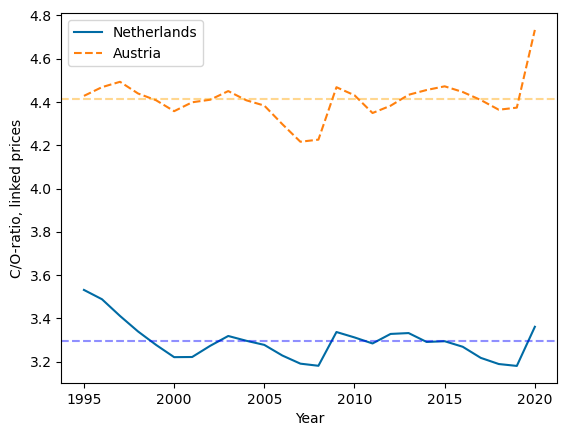

In [13]:
# plot c/o-ratio for netherlands and austria over time
countrylist = ('Netherlands','Austria') #List of countries to be plotted

ll=0
for country in countrylist:
    df_country = merged[merged['country'] == country]
    plt.plot(df_country['year'], df_country['c/o-ratio'], label = country, linestyle = lines[ll])
    # add the mean c/o-ratio for each country
    plt.axhline(y=mean['Netherlands'], color='blue', linestyle='--', alpha=0.25)
    plt.axhline(y=mean['Austria'], color='orange', linestyle='--', alpha=0.25)
    ll+=1


plt.xlabel('Year')
plt.ylabel('C/O-ratio, linked prices')
plt.legend()
plt.show()